In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from miccai_dice import dice

import scipy


In [2]:
pred = np.zeros((55, 55))
gt   = np.zeros((55, 55))

pred[3:19, 3:19] = 1
gt[3:19, 3:19] = 1

pred[21:23, 21:23] = 1
gt[21:22, 21:23] = 1

dilation_struct = scipy.ndimage.generate_binary_structure(2, 3)
gt_dil = scipy.ndimage.binary_dilation(gt, iterations=1)

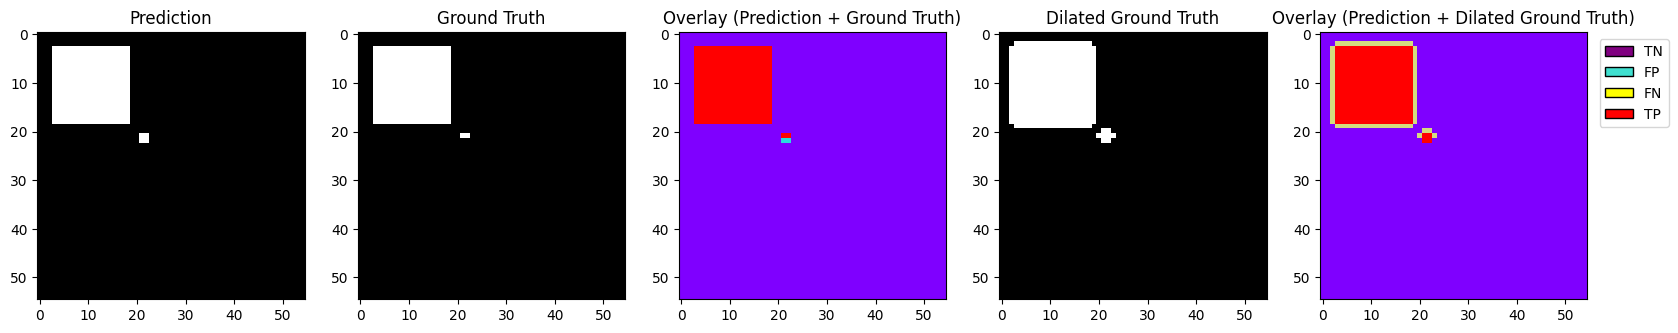

Legacy Dice  : 0.9961389961389961
Dilated Dice: 0.8843537414965986


In [3]:
gt_display = gt*2
gt_display_dil = gt_dil*2

fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax[0].imshow(pred, cmap='gray')
ax[0].set_title('Prediction')

ax[1].imshow(gt_display, cmap='gray')
ax[1].set_title('Ground Truth')

im2 = ax[2].imshow(pred + gt_display, cmap='rainbow')
ax[2].set_title('Overlay (Prediction + Ground Truth)')

ax[3].imshow(gt_display_dil, cmap='gray')
ax[3].set_title('Dilated Ground Truth')

im4 = ax[4].imshow(pred + gt_display_dil, cmap='rainbow')
ax[4].set_title('Overlay (Prediction + Dilated Ground Truth)')

legend_elements = [Patch(facecolor='purple', edgecolor='black', label='TN'),
                   Patch(facecolor='turquoise', edgecolor='black', label='FP'),
                   Patch(facecolor='yellow', edgecolor='black', label='FN'),
                   Patch(facecolor='red', edgecolor='black', label='TP')]

# ax[2].legend(handles=legend_elements, loc='upper left')
ax[4].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.show()

print('Legacy Dice  :', dice(pred, gt))
print('Dilated Dice:', dice(pred, gt_dil))